# Titanic - Machine Learning from Disaster

## 1. Load datasets

In [1]:
# Import modules
import kaggle
import pandas as pd
import numpy as np
import zipfile
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download the competition dataset using the API key in the .kaggle directory
competition_name = "titanic"
kaggle.api.competition_download_files(competition_name, path='.kaggle')

In [3]:
# Unzip the file
zip_file_path = '.kaggle/titanic.zip'
extracted_folder_path = '.kaggle/titanic_data'
os.makedirs(extracted_folder_path, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)
print("Files extracted to:", extracted_folder_path)

Files extracted to: .kaggle/titanic_data


In [4]:
from os import listdir
print(listdir(extracted_folder_path))

['gender_submission.csv', 'test.csv', 'train.csv']


In [5]:
# Load datasets
train_df=pd.read_csv(extracted_folder_path+'/train.csv')
test_df=pd.read_csv(extracted_folder_path+'/test.csv')

In [6]:
# Viewing attributes
train_df.columns
# The Survived column use to identify who are surviving. An attribute for Machine learning to define a passenger die or live

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
train_df.set_index(train_df.PassengerId,inplace=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.drop('PassengerId', axis=1, inplace=True) #axis=1 => all rows, inplace => on this data

In [12]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
test_df.set_index(test_df.PassengerId,inplace=True)
test_df.drop('PassengerId', axis=1, inplace=True) #axis=1 => all rows, inplace => on this data
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 2. Features classification

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [16]:
features= ['Pclass','Sex','SibSp','Parch','Embarked']
def convert_2category (df, features): # df: dataframe, features: list
    for feature in features:
        df[feature]=df[feature].astype('category')
convert_2category(train_df,features)
convert_2category(test_df,features)

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(5), float64(2), int64(1), object(3)
memory usage: 54.2+ KB


### 2.1. Distribution of Numerical features

In [18]:
train_df.describe() # describe numerical features

,Survived,Age,Fare
count,891.000000,714.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,14.526497,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,20.125000,7.910400
50%,0.000000,28.000000,14.454200
75%,1.000000,38.000000,31.000000
max,1.000000,80.000000,512.329200


### 2.2. Distribution of Categorical features

In [19]:
train_df.describe(include=['category'])

,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,889
unique,3,2,7,7,3
top,3,male,0,0,S
freq,491,577,608,678,644


## 3. Exploratory Data Analysis (EDA)

### Correlating categorical features

Categorical: `Survived`, `Sex`, `Embarked`, `Pclass`(ordinal), `SibSp`, `Parch`

## `Survived`

In [20]:
train_df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


In [21]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


only 38% survived the disaster. So the training data suffers from data imbalance but it is not severe which is why i will not consider techniques like sampling to tackle the imbalance

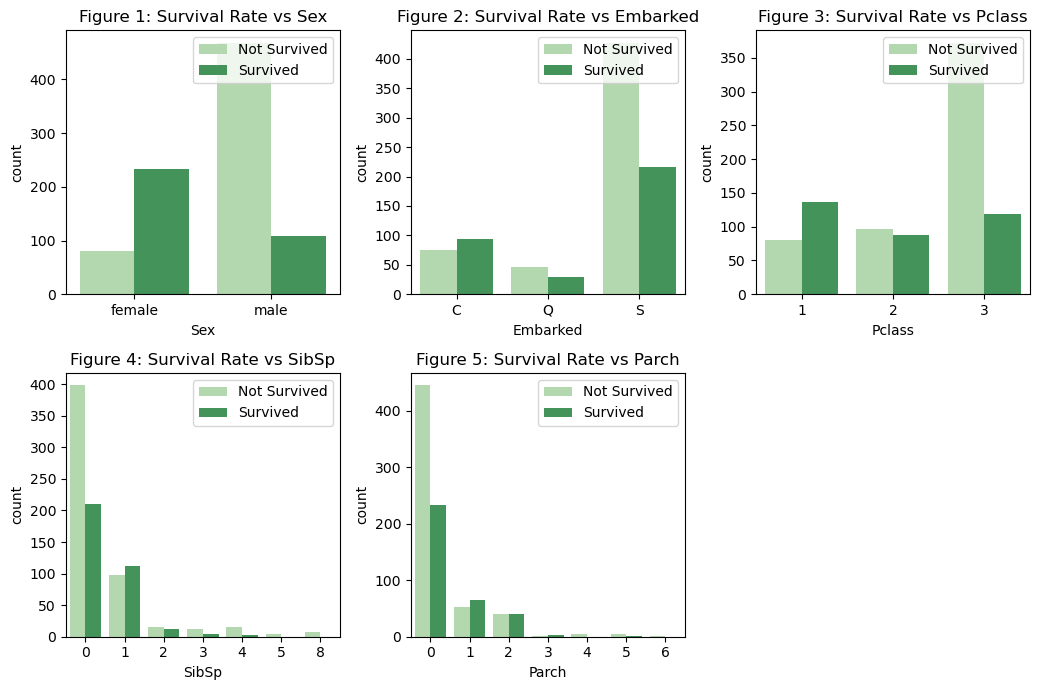

In [42]:
cats=['Sex','Embarked','Pclass','SibSp','Parch']
rows,cols,expand=2,3,3.5
fig,ax=plt.subplots(rows,cols,figsize=(cols*expand,rows*expand))
for r in range(rows):
    for c in range(cols):
        i=r*cols+c # index to loop through list cats
        if i <len(cats):
            ax_i=ax[r,c]
            sns.countplot(data=train_df, x=cats[i],hue='Survived', palette='Greens', ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cats[i]}")
            ax_i.legend(title='',loc='upper right',labels=['Not Survived','Survived'])
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

## Observation
Survival Rate:
- Fig 1: Female survival rate > male
- Fig 2: Most People embarked on Southampton, and also had the highest people not survived
- Fig 3: 1st class higher survival rate
- Fig 4: People going with 0 SibSp are mostly not survived. The number of passenger with 1-2 family members has a better chance of survival
- Fig 5: People going with 0 Parch are mostly not survived.

## 3.2. EDA for Numerical Features
- Numerical Features: `Age`, `Fare`

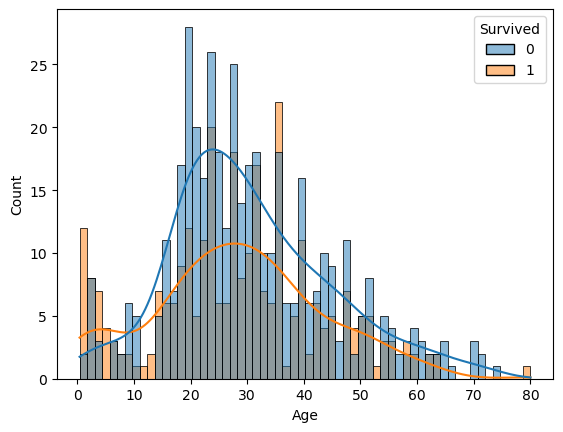

In [48]:
sns.histplot(data=train_df, x='Age', hue='Survived', bins= 60, kde= True);

## Fare

In [50]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Distribution of Fare
- Fare does not follow a normal distribution and has a huge spike at the price range (0-100 dollars)
- The distribution is skewed to the left with `75%` of the fare paid under `31 dollars` and a max paid fare of `512 dollars`
Quartile plot
- Passenger wiht luxury & Expensive Fare will have more chance to survive

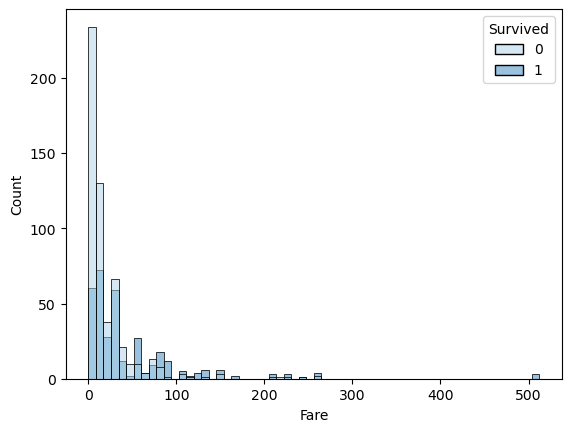

In [51]:
sns.histplot(data=train_df, x='Fare', hue='Survived', bins=60, palette="Blues");

<Axes: xlabel='Fare', ylabel='count'>

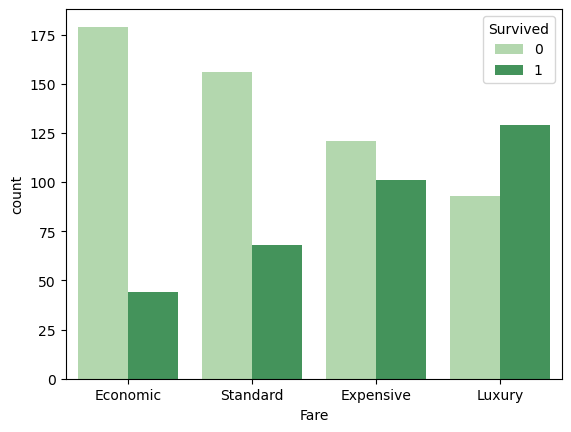

In [56]:
# To name for 0-25%, quartile, 25-50, 50-75, 75-100
fare_categories=['Economic', 'Standard', 'Expensive','Luxury']
quartile_data= pd.qcut(train_df['Fare'], 4, labels= fare_categories )
sns.countplot(x=quartile_data,hue=train_df['Survived'], palette="Greens")